App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


ValueError: could not convert string to float: 'Free'

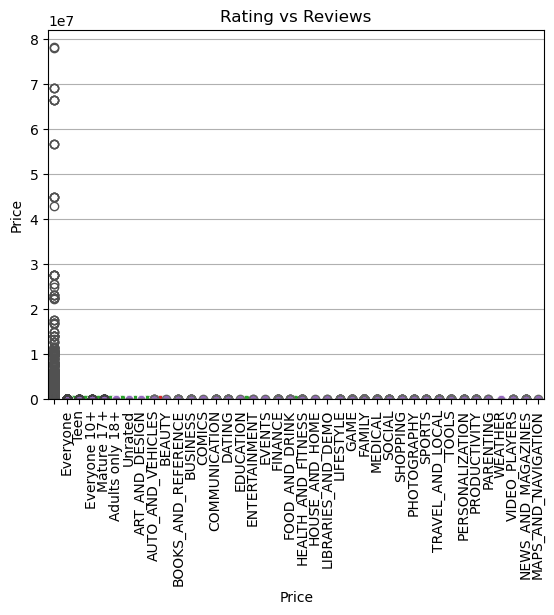

In [10]:
import pandas as pd
import numpy as np
# If the file is in another folder
df = pd.read_csv(r'D:\SIMPLILEARN\googleplaystore.csv')
print(df.isnull().sum())
df.dropna(inplace=True)
def size_to_kb(size):
    if 'M' in size:
        return float(size.replace('M','')) * 1000
    elif 'k' in size:
        return float(size.replace('k',''))
    else:
        return np.nan

df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].apply(lambda x: size_to_kb(str(x)))
df['Reviews'] = df['Reviews'].astype(int)
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)
df = df[df['Rating'].between(1, 5)]
df = df[df['Reviews'] <= df['Installs']]
df = df[~((df['Type'] == 'Free') & (df['Price'] > 0))]
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots
sns.boxplot(df['Price']); plt.title("Price")
sns.boxplot(df['Reviews']); plt.title("Reviews")

# Histograms
df['Rating'].hist(bins=20); plt.title("Rating Distribution")
df['Size'].hist(bins=20); plt.title("Size Distribution")
# Price outliers
df = df[df['Price'] < 200]

# Reviews outliers
df = df[df['Reviews'] <= 2_000_000]

# Installs cutoff based on percentile
install_threshold = df['Installs'].quantile(0.99)
df = df[df['Installs'] <= install_threshold]
# Scatter plots
sns.scatterplot(x='Price', y='Rating', data=df); plt.title("Rating vs Price")
sns.scatterplot(x='Size', y='Rating', data=df); plt.title("Rating vs Size")
sns.scatterplot(x='Reviews', y='Rating', data=df); plt.title("Rating vs Reviews")

# Boxplots
sns.boxplot(x='Content Rating', y='Rating', data=df); plt.xticks(rotation=90)
sns.boxplot(x='Category', y='Rating', data=df); plt.xticks(rotation=90)
# Create a copy
inp1 = df.copy()

# Log transform
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

# Drop irrelevant columns
inp1.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'], inplace=True)

# Get dummies
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating'])
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(inp2, test_size=0.3, random_state=42)

X_train = df_train.drop('Rating', axis=1)
y_train = df_train['Rating']
X_test = df_test.drop('Rating', axis=1)
y_test = df_test['Rating']
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Train R²
print(f"Train R²: {model.score(X_train, y_train):.4f}")

# Test R²
y_pred = model.predict(X_test)
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")


